# Convolution Nets for MNIST

Deep Learning models can take quite a bit of time to run, particularly if GPU isn't used. 

In the interest of time, you could sample a subset of observations (e.g. $1000$) that are a particular number of your choice (e.g. $6$) and $1000$ observations that aren't that particular number (i.e. $\neq 6$). 

We will build a model using that and see how it performs on the test dataset

In [1]:
import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['THEANO_FLAGS'] = "device=gpu2"

#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist
from keras.models import load_model

Using Theano backend.
Using gpu device 2: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5105)
/users/bharat.b/.local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [3]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [4]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [5]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data Preparation

#### Very Important: 
When dealing with images & convolutions, it is paramount to handle `image_data_format` properly

In [6]:
img_rows, img_cols = 28, 28
'''
if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)
'''
shape_ord = (1, img_rows, img_cols)

#### Preprocess and Normalise Data

In [7]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [8]:
# Converting the classes to its binary categorical form
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

# A simple CNN

In [9]:
# -- Initializing the values for the convolution neural network

nb_epoch = 100  # kept very low! Please increase if you have GPU

batch_size = 30000
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

#### Step 1: Model Definition

In [110]:
model = Sequential()

model.add(Conv2D(nb_filters, nb_conv, nb_conv, 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

#### Step 2: Compile

In [111]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### Step 3: Fit

In [10]:
# Train or load! you choose!!
'''
hist = model.fit(X_train, y_train, batch_size=batch_size, 
                 nb_epoch=nb_epoch, verbose=1, 
                 validation_data=(X_test, y_test))
model.save('example_MNIST_CNN_base.h5')
'''
model=load_model('example_MNIST_CNN_base.h5')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_6 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_13 (Activation)       (None, 32, 26, 26)    0           convolution2d_6[0][0]            
____________________________________________________________________________________________________
flatten_6 (Flatten)              (None, 21632)         0           activation_13[0][0]              
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 10)            216330      flatten_6[0][0]                  
___________________________________________________________________________________________

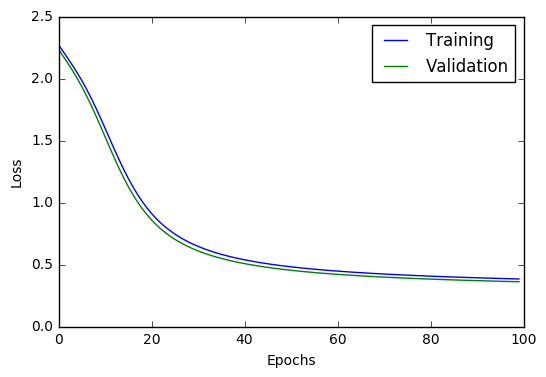

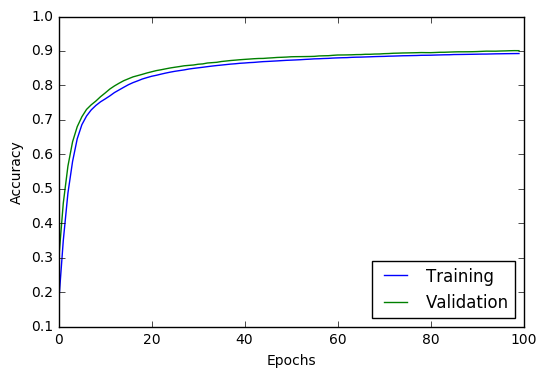

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

### Step 4: Evaluate

In [11]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'acc']


In [12]:
# Evaluating the model on the test data    
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

('Test Loss:', 0.36093157870769499)
('Test Accuracy:', 0.90080000000000005)


### Let's plot our model Predictions!

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

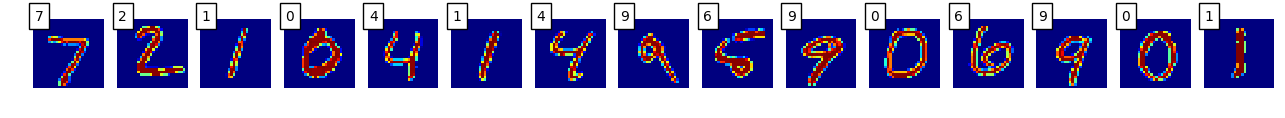

In [14]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test[i,0], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [88]:
model = Sequential()
model.add(Conv2D(nb_filters, nb_conv, nb_conv, input_shape=shape_ord))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Ah, another path to choose, Train or load!!
'''
hist = model.fit(X_train, y_train, batch_size=batch_size, 
                 nb_epoch=nb_epoch, verbose=1, 
                 validation_data=(X_test, y_test))
model.save('example_MNIST_CNN_more_dense.h5')
'''
model=load_model('example_MNIST_CNN_more_dense.h5')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_15 (Activation)       (None, 32, 26, 26)    0           convolution2d_7[0][0]            
____________________________________________________________________________________________________
flatten_7 (Flatten)              (None, 21632)         0           activation_15[0][0]              
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 128)           2769024     flatten_7[0][0]                  
___________________________________________________________________________________________

In [16]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

('Test score:', 0.46507161331176755)
('Test accuracy:', 0.88390000000000002)


# Adding more Convolution Layers

In [10]:
model = Sequential()
model.add(Conv2D(nb_filters, nb_conv, nb_conv, input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#'''
hist = model.fit(X_train, y_train, batch_size=batch_size/2, 
                 nb_epoch=nb_epoch, verbose=1, 
                 validation_data=(X_test, y_test))
model.save('example_MNIST_CNN_more_conv.h5')
#'''
#model=load_model('example_MNIST_CNN_more_conv.h5')
#model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s - loss: 2.3051 - acc: 0.0960 - val_loss: 2.2946 - val_acc: 0.0716
Epoch 2/100
60000/60000 [==============================] - 2s - loss: 2.2971 - acc: 0.1034 - val_loss: 2.2860 - val_acc: 0.0825
Epoch 3/100
60000/60000 [==============================] - 2s - loss: 2.2901 - acc: 0.1121 - val_loss: 2.2777 - val_acc: 0.1079
Epoch 4/100
60000/60000 [==============================] - 2s - loss: 2.2815 - acc: 0.1273 - val_loss: 2.2695 - val_acc: 0.1491
Epoch 5/100
60000/60000 [==============================] - 2s - loss: 2.2748 - acc: 0.1393 - val_loss: 2.2613 - val_acc: 0.2022
Epoch 6/100
60000/60000 [==============================] - 2s - loss: 2.2677 - acc: 0.1507 - val_loss: 2.2528 - val_acc: 0.2561
Epoch 7/100
60000/60000 [==============================] - 2s - loss: 2.2603 - acc: 0.1643 - val_loss: 2.2439 - val_acc: 0.3017
Epoch 8/100
60000/60000 [=============================

In [13]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

('Test score:', 0.33523815140724184)
('Test accuracy:', 0.90639999999999998)


# Exercise

The above code has been written as a function. 

Change some of the **hyperparameters** and see what happens. 

In [ ]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, nb_conv, nb_conv, 
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, nb_conv, nb_conv))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, y_train, batch_size=batch_size, 
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, y_test))
          

    #Evaluating the model on the test data    
    score, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)